In [1]:
from typing import Annotated, Dict, List, Any
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage

print("All imports successfull")

All imports successfull


In [2]:
class State(TypedDict):
    messages: Annotated[List, add_messages]

In [3]:
def should_continue(state: State) -> str:
    last_message = state['messages'][-1].content.lower()
    if any(char in last_message for char in ['+', '-', '*', '/']):
        return 'calculator'
    else:
        return '__end__'

In [4]:
def calculator(state: State) -> Dict[str, Any]:
    exp = state['messages'][-1].content.lower()
    try:
        result = eval(exp)
        reply = f"The answer is {str(result)}"
    except Exception as e:
        reply = "Sorry Could not calculate that"
    return {'messages': [AIMessage(content=reply)]}

In [7]:
graph = StateGraph(State)

graph.add_node("calculator_node", calculator)

graph.add_conditional_edges(
    START,
    should_continue,
    {
        "calculator": "calculator_node",
        "__end__": "__end__"
    }
)
graph.add_edge("calculator_node", END)

app = graph.compile()

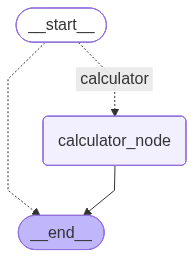

In [8]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [9]:
def test(user_input):
    state: State = {
        "messages": [HumanMessage(content=user_input)],
    }
    state = app.invoke(state)
    print("\n--- Response 1 ---")
    for m in state["messages"]:
        print(m.__class__.__name__, ":", m.content)

In [10]:
test("2+2*3")


--- Response 1 ---
HumanMessage : 2+2*3
AIMessage : The answer is 8


In [11]:
test("Hi How are you?")


--- Response 1 ---
HumanMessage : Hi How are you?
